In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib.colors import ColorConverter
import pickle
import seaborn as sns

In [2]:
with open('../data/mol_dict', 'rb') as f:
    mol_dict = pickle.load(f)

In [57]:
records = np.load('/data/zhao/MONN/results/240116/transformer/load_model/records.npy', allow_pickle=True).tolist()
# sorted_records = sorted(records, key=lambda x: x['auc'], reverse=True)
sorted_records = sorted(records, key=lambda x: x['auc'], reverse=False)
baseline_records = np.load('/data/zhao/MONN/results/240116/transformer/load_model/baseline_records.npy', allow_pickle=True).item()

In [38]:
record = sorted_records[129]
print(record['pdbid'])

3u8w


In [65]:
# 4x3t 39 0.9663331019263222 (29, 158) 9th element
record = sorted_records[192]
print(record['pdbid'])
fpr, tpr, thresholds = metrics.roc_curve(record['int_label'].reshape(-1), record['int_pred'].reshape(-1))
# plt.plot(fpr, tpr)
# for i, value in enumerate(fpr):
#     print(i, value)
optimal_idx = 22
print(optimal_idx)
threshold = thresholds[optimal_idx]
print(fpr[optimal_idx], tpr[optimal_idx], metrics.auc(fpr, tpr))
print(threshold)
binary_predictions = (record['int_pred'] >= threshold).astype(int)
non_zero_rows, non_zero_cols = np.nonzero(binary_predictions)
row_indicators = np.zeros(binary_predictions.shape[0], dtype=int)
col_indicators = np.zeros(binary_predictions.shape[1], dtype=int)
row_indicators[np.unique(non_zero_rows)] = 1
col_indicators[np.unique(non_zero_cols)] = 1
print("Binary Predictions:")
print("Row indicators:", row_indicators)
print("Column indicators:", col_indicators)
print(len(np.unique(non_zero_rows)), len(np.unique(non_zero_cols)))
# for i in range(50):
#     optimal_idx = i
#     # print(optimal_idx)
#     threshold = thresholds[optimal_idx]
#     # print(fpr[optimal_idx], tpr[optimal_idx], metrics.auc(fpr, tpr))
#     # print(threshold)
#     binary_predictions = (record['int_pred'] >= threshold).astype(int)
#     non_zero_rows, non_zero_cols = np.nonzero(binary_predictions)
#     row_indicators = np.zeros(binary_predictions.shape[0], dtype=int)
#     col_indicators = np.zeros(binary_predictions.shape[1], dtype=int)
#     row_indicators[np.unique(non_zero_rows)] = 1
#     col_indicators[np.unique(non_zero_cols)] = 1
#     # print("Binary Predictions:")
#     # print("Row indicators:", row_indicators)
#     # print("Column indicators:", col_indicators)
#     print(i, len(np.unique(non_zero_rows)), len(np.unique(non_zero_cols)), fpr[i], np.count_nonzero(record['int_pred'] >= threshold))
#     print('__________________')

4jpa
22
0.03499562554680665 0.08333333333333333 0.7486850602008082
0.0040003844
Binary Predictions:
Row indicators: [1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
Column indicators: [0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 

In [63]:
pdbid = '4jpa'
fpr, tpr, thresholds = metrics.roc_curve(baseline_records[pdbid]['int_label'].reshape(-1), 
                                         baseline_records[pdbid]['int_pred'].reshape(-1))
# plt.plot(fpr, tpr)
# for i, value in enumerate(fpr):
#     print(i, value)
optimal_idx = 4
print(optimal_idx)
threshold = thresholds[optimal_idx]
print(fpr[optimal_idx], tpr[optimal_idx], metrics.auc(fpr, tpr))
print(threshold)
binary_predictions = (baseline_records[pdbid]['int_pred'] >= threshold).astype(int)
non_zero_rows, non_zero_cols = np.nonzero(binary_predictions)
row_indicators = np.zeros(binary_predictions.shape[0], dtype=int)
col_indicators = np.zeros(binary_predictions.shape[1], dtype=int)
row_indicators[np.unique(non_zero_rows)] = 1
col_indicators[np.unique(non_zero_cols)] = 1
print("Binary Predictions:")
print("Row indicators:", row_indicators)
print("Column indicators:", col_indicators)
print(len(np.unique(non_zero_rows)))
print(len(np.unique(non_zero_cols)))
# for i in range(400):
#     optimal_idx = i
#     # print(optimal_idx)
#     threshold = thresholds[optimal_idx]
#     # print(fpr[optimal_idx], tpr[optimal_idx], metrics.auc(fpr, tpr))
#     # print(threshold)
#     binary_predictions = (baseline_records[pdbid]['int_pred'] >= threshold).astype(int)
#     non_zero_rows, non_zero_cols = np.nonzero(binary_predictions)
#     row_indicators = np.zeros(binary_predictions.shape[0], dtype=int)
#     col_indicators = np.zeros(binary_predictions.shape[1], dtype=int)
#     row_indicators[np.unique(non_zero_rows)] = 1
#     col_indicators[np.unique(non_zero_cols)] = 1
#     # print("Binary Predictions:")
#     # print("Row indicators:", row_indicators)
#     # print("Column indicators:", col_indicators)
#     print(i, len(np.unique(non_zero_rows)), len(np.unique(non_zero_cols)), fpr[i], np.count_nonzero(baseline_records[pdbid]['int_pred'] >= threshold))
#     print('__________________')

4
0.0011873515810523684 0.0 0.8902298670999459
0.010392148
Binary Predictions:
Row indicators: [0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1]
Column indicators: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [59]:
rows, cols = np.nonzero(record['int_label'])
label_non_zero_rows, label_non_zero_cols = np.nonzero(record['int_label'])
label_row_indicators = np.zeros(record['int_label'].shape[0], dtype=int)
label_col_indicators = np.zeros(record['int_label'].shape[1], dtype=int)
label_row_indicators[np.unique(label_non_zero_rows)] = 1
label_col_indicators[np.unique(label_non_zero_cols)] = 1

# Print the rows and columns containing non-zero elements
print(record['int_label'].shape)
print("Rows with non-zero elements:", len(np.unique(rows)))
print("Columns with non-zero elements:", len(np.unique(cols)))
print(len(label_col_indicators))

(34, 471)
Rows with non-zero elements: 12
Columns with non-zero elements: 6
471


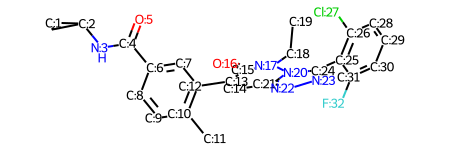

In [30]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(mol)

In [84]:
# mol = mol_dict['45E']
mol = mol_dict['AZ6']
n_atoms = mol.GetNumAtoms()
print(n_atoms)

# Draw the molecule
# RDKit supports different formats; here we use an IPython display
img = Draw.MolToImage(mol, size=(300, 300), highlightAtoms = np.unique(label_non_zero_rows).tolist(), highlightColor=ColorConverter().to_rgb('#389BF8'))
img.save('/data/zhao/MONN/src/plot_utils/label1.png')

34


In [95]:
mol = mol_dict['AZ6']
n_atoms = mol.GetNumAtoms()
print(n_atoms)

# Draw the molecule
# RDKit supports different formats; here we use an IPython display
img = Draw.MolToImage(mol, size=(300, 300), highlightAtoms = np.unique(non_zero_rows).tolist(), highlightColor=ColorConverter().to_rgb('#389BF8'))
img.save('/data/zhao/MONN/src/plot_utils/pred.png')

34


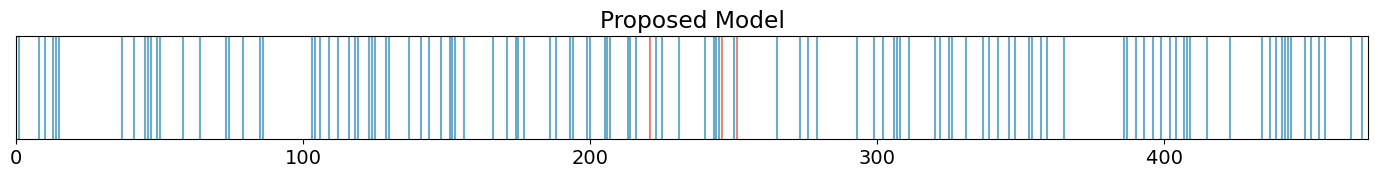

In [66]:
plt.rcParams.update({'font.size': 14}) 
label = label_col_indicators
data = col_indicators
# data = label_col_indicators
plt.figure(figsize=(14, 2))

# Plotting vertical lines only at indices where the value is 1
for i, value in enumerate(data):
    if value == 1 and label[i] == 1:  
        plt.axvline(x=i, color=ColorConverter().to_rgb('#DF573B'), linestyle='-', alpha=0.7)
    elif value == 1:
        plt.axvline(x=i, color=ColorConverter().to_rgb('#2D8BB6'), linestyle='-', alpha=0.7)    

# Adding labels and title
plt.xlim(0, len(data))
# plt.xlabel('Indices of residues')
plt.yticks([])
plt.title('Proposed Model')

# Show the plot
plt.tight_layout()
plt.savefig('/data/zhao/MONN/src/plot_utils/seq_label.png')